### Differential Expression of UC vs Normal PBMCs

The goal of this analysis is to determine the genes that are expressed differently (higher or lower) between the PBMCs of the Ulcerative Colitis and Normal patients.

In [2]:
# Import our libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import from sklearn.
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import matplotlib
matplotlib.style.use('ggplot')

pd.options.display.max_columns = 100
df = pd.read_csv('crohns.csv', index_col='ID_REF')

In [3]:
df.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76056,GSM76057,GSM76058,GSM76059,GSM76060,GSM76061,GSM76062,GSM76063,GSM76064,GSM76065,GSM76066,GSM76067,GSM76068,GSM76069,GSM76070,GSM76071,GSM76072,GSM76073,GSM76074,GSM76075,GSM76076,GSM76077,GSM76078,GSM76079,...,GSM76107,GSM76108,GSM76109,GSM76110,GSM76111,GSM76112,GSM76113,GSM76114,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.073757,6.479443,6.193996,6.523940,6.071335,5.913494,6.774238,6.310667,6.040967,6.018622,6.078189,6.115689,5.697258,6.357936,6.110460,6.437110,6.412185,6.064644,6.470831,6.857042,5.769459,6.412313,6.249727,6.720460,...,6.858734,5.962292,6.253489,6.238440,6.537258,6.285958,6.027515,6.298321,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.821506,4.894714,5.312187,4.831496,4.361319,4.254259,5.485159,4.607696,4.972134,5.006505,4.874971,5.293084,5.389189,5.310517,3.878980,5.001949,4.990839,4.689582,5.066674,4.953094,5.113617,5.435301,5.173542,4.788608,...,4.496257,4.802902,4.659385,5.136380,4.742369,4.846875,5.174210,5.244204,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,4.630328,5.605788,5.257950,4.449917,5.034140,5.400625,5.441565,5.668221,5.219335,5.599813,6.539672,7.018696,6.411289,5.802769,5.120004,5.266599,4.974462,4.852375,5.417188,8.170643,6.989161,5.623533,5.751630,4.680720,...,6.248449,5.370894,6.230972,5.870897,5.671046,6.377512,5.544193,6.102169,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.326602,

In [32]:
#construct three lists of disease types
UC = ['GSM76030', 'GSM76031', 'GSM76032', 'GSM76033', 'GSM76034', 'GSM76035', 'GSM76036', 'GSM76037', 'GSM76038', 'GSM76039',
     'GSM76040', 'GSM76041', 'GSM76042', 'GSM76043', 'GSM76044', 'GSM76045', 'GSM76046', 'GSM76047', 'GSM76048', 'GSM76049', 
     'GSM76050', 'GSM76051', 'GSM76052', 'GSM76053', 'GSM76054', 'GSM76055']

CD = ['GSM76056', 'GSM76057', 'GSM76058', 'GSM76059', 'GSM76060', 'GSM76061', 'GSM76062', 'GSM76063', 'GSM76064', 'GSM76065',
     'GSM76066', 'GSM76067', 'GSM76068', 'GSM76069', 'GSM76070', 'GSM76071', 'GSM76072', 'GSM76073', 'GSM76074', 'GSM76075',
     'GSM76076', 'GSM76077', 'GSM76078', 'GSM76079', 'GSM76080', 'GSM76081', 'GSM76082', 'GSM76083', 'GSM76084', 'GSM76085',
     'GSM76086', 'GSM76087', 'GSM76088', 'GSM76089', 'GSM76090', 'GSM76091', 'GSM76092', 'GSM76093', 'GSM76094', 'GSM76095',
     'GSM76096', 'GSM76097', 'GSM76098', 'GSM76099', 'GSM76100', 'GSM76101', 'GSM76102', 'GSM76103', 'GSM76104', 'GSM76105',
     'GSM76106', 'GSM76107', 'GSM76108', 'GSM76109', 'GSM76110', 'GSM76111', 'GSM76112', 'GSM76113', 'GSM76114']

NM = ['GSM76115', 'GSM76116', 'GSM76117', 'GSM76118', 'GSM76119', 'GSM76120', 'GSM76121', 'GSM76122', 'GSM76123', 'GSM76124', 
      'GSM76125', 'GSM76126', 'GSM76127', 'GSM76128', 'GSM76129', 'GSM76130', 'GSM76131', 'GSM76132', 'GSM76133', 'GSM76134', 
      'GSM76135', 'GSM76136', 'GSM76137', 'GSM76138', 'GSM76139', 'GSM76140', 'GSM76141', 'GSM76142', 'GSM76143', 'GSM76144', 
      'GSM76145', 'GSM76146', 'GSM76147', 'GSM76148', 'GSM76149', 'GSM76150', 'GSM76151', 'GSM76152', 'GSM76153', 'GSM76154', 
      'GSM76155', 'GSM76156']

In [33]:
len(UC), len(CD), len(NM)

(26, 59, 42)

In [34]:
#compare only UC and NM so will drop CD

uc = df.drop(columns=CD)

In [35]:
uc.head()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
ID_REF,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1007_s_at,6.382661,6.589557,6.608669,6.397301,6.231299,5.929730,6.074643,6.526892,6.729527,6.045421,6.331441,6.274374,6.496154,6.358507,6.158130,6.496644,6.185766,6.169309,6.598857,6.261507,6.359359,6.331351,6.285030,6.501876,5.735505,6.319850,6.335009,5.976928,5.946522,6.297048,6.756208,6.661990,6.524403,6.522643,6.119776,6.725851,5.904653,6.303294,6.634581,6.729989,5.935937,6.310515,6.129484,6.377719,5.941845,6.149118,6.095989,6.186103,6.123071,5.856623,6.015983,6.414365,5.842242,5.961018,5.633461,6.408309,6.173188,6.348845,6.202164,6.425718,6.323964,6.301666,6.402520,6.561243,5.743080,6.459312,6.385285,6.145335
1053_at,5.871326,4.878061,5.449387,4.899039,4.584867,5.209132,4.693102,3.977666,4.566600,5.102809,4.959941,5.079732,4.591336,4.912968,4.396805,4.477802,4.526972,5.213776,5.215913,4.785458,5.276424,5.229924,4.878334,4.641271,5.129132,4.751195,4.700032,4.502854,4.613833,4.410685,4.834576,4.861338,4.492312,4.561338,5.161655,4.407452,5.492558,4.627019,5.270660,4.250016,4.837356,5.021156,4.918464,4.475635,3.809461,4.415784,5.198838,4.745639,5.067949,4.559183,4.888661,5.824860,4.639751,4.328384,4.652291,4.525446,4.742527,4.542567,4.018870,4.869823,4.594830,4.692336,5.042849,4.782566,4.753444,5.138295,4.618365,4.353786
117_at,5.835663,5.921491,6.736059,6.043868,5.958280,5.852238,6.581454,5.679843,6.073959,5.858080,5.883117,5.993516,6.186025,5.996046,5.851926,6.456817,6.425097,5.869971,6.628892,5.933291,5.419400,6.160361,5.619221,5.778860,6.330025,5.574331,5.630438,6.135886,6.011312,5.361476,6.324106,6.443518,6.117733,5.428021,5.566092,6.977216,5.833707,6.524963,6.814857,6.619354,5.297264,6.242569,5.942064,5.977965,5.202133,5.999923,5.494490,5.771217,5.683317,5.791413,5.327446,5.746793,5.558513,6.360571,5.869865,5.677152,5.609986,6.125023,5.425782,5.182849,5.534319,5.654300,5.712656,6.079347,5.873668,5.945533,5.981726,5.419848
121_at,8.103100,8.443505,8.494700,7.895723,7.946928,8.134139,8.011350,8.199173,8.511109,8.347532,8.157562,8.136901,8.345359,8.184977,8.033005,8.035576,7.738157,8.068512,8.053709,8.067641,8.114891,8.031708,8.101416,8.153414,7.781820,7.955671,8.287631,8.117057,7.760653,8.126263,8.049252,7.929405,8.066696,8.301514,7.775264,8.282086,7.748409,7.992017,7.825189,7.875022,7.790800,7.816047,7.857148,8.267878,7.963128,8.065209,8.298011,7.890465,7.919581,8.194156,7.933733,8.532821,8.016334,7.778547,7.855730,8.075787,8.123974,8.254422,8.016654,7.670828,8.005853,7.992805,8.044182,8.461163,7.881406,8.073685,8.414237,8.322637
1255_g_at,3.529799,3.434311,4.393491,3.379032,1.886032,2.982644,3.408144,3.968622,3.119327,2.890177,3.258181,3.033909,3.704596,3.796885,1.261272,3.575643,2.132829,3.678177,3.958462,3.264827,3.042681,1.381743,2.575077,3.077898,3.128075,3.455178,1.766280,4.324303,3.014594,1.149704,3.251342,3.806172,4.171146,4.395893,3.087118,4.991941,3.186711,1.092625,3.580893,3.748439,0.892063,1.041179,4.348545,3.203081,3.546541,3.508761,3.712027,1.360670,2.987488,3.658533,2.559419,4.105248,3.271312,3.525618,2.340385,3.297559,3.531110,3.394466,2.500980,3.146405,3.502374,3.448417,3.479563,3.629811,2.889205,2.485850,4.221682,3.842898


In [36]:
uc.describe()

,GSM76030,GSM76031,GSM76032,GSM76033,GSM76034,GSM76035,GSM76036,GSM76037,GSM76038,GSM76039,GSM76040,GSM76041,GSM76042,GSM76043,GSM76044,GSM76045,GSM76046,GSM76047,GSM76048,GSM76049,GSM76050,GSM76051,GSM76052,GSM76053,GSM76054,GSM76055,GSM76115,GSM76116,GSM76117,GSM76118,GSM76119,GSM76120,GSM76121,GSM76122,GSM76123,GSM76124,GSM76125,GSM76126,GSM76127,GSM76128,GSM76129,GSM76130,GSM76131,GSM76132,GSM76133,GSM76134,GSM76135,GSM76136,GSM76137,GSM76138,GSM76139,GSM76140,GSM76141,GSM76142,GSM76143,GSM76144,GSM76145,GSM76146,GSM76147,GSM76148,GSM76149,GSM76150,GSM76151,GSM76152,GSM76153,GSM76154,GSM76155,GSM76156
count,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000,22284.000000
mean,5.091014,5.337954,5.176947,5.095218,4.832847,4.916582,5.102724,5.068267,5.265786,5.089211,5.184235,5.147241,5.139282,5.119878,5.151902,5.134589,5.115141,5.032407,5.114922,4.975056,5.061665,4.981375,5.071559,5.067427,5.032960,4.981319,5.165854,5.069466,5.044676,5.147873,5.217989,5.088860,5.107344,5.152474,5.045718,5.269295,4.933681,4.987804,5.098653,5.097454,4.993117,5.158922,4.978454,5.051406,4.887508,5.015136,5.021520,4.981466,4.958812,5.149870,5.018019,5.281794,4.971117,5.106086,4.856792,5.018933,5.077267,5.117289,5.052538,4.981282,4.993106,5.050037,5.070986,5.264874,4.820503,5.022019,5.177019,5.074672
std,2.507524,2.306108,2.442225,2.496283,2.685257,2.618854,2.506809,2.529524,2.359056,2.534840,2.428715,2.435132,2.470421,2.490179,2.443262,2.447465,2.469176,2.522407,2.500880,2.574243,2.522074,2.585782,2.495092,2.546764,2.553230,2.591168,2.454024,2.514371,2.541655,2.441080,2.441914,2.540155,2.492612,2.466564,2.582823,2.368438,2.681412,2.586125,2.563877,2.525861,2.578652,2.481214,2.592194,2.562839,2.665670,2.570792,2.580074,2.571767,2.629930,2.450902,2.568505,2.356740,2.610413,2.503192,2.699232,2.582058,2.518554,2.487787,2.538459,2.603363,2.588593,2.540375,2.513317,2.355090,2.722189,2.555016,2.444300,2.524221
min,-5.130264,-2.961710,-2.187247,-4.370191,-4.970616,-4.872562,-4.719452,-4.026722,-3.717990,-3.436307,-3.467709,-3.550245,-3.395185,-4.865101,-4.507730,-3.350692,-3.673555,-2.527907,-2.983840,-4.611297,-4.757501,-4.880785,-3.786831,-3.254909,-3.245697,-3.810622,-3.795980,-3.165531,-4.080698,-3.024173,-3.536051,-4.955407,-3.391229,-2.618819,-4.341537,-3.558687,-4.529489,-3.676374,-4.473482,-3.010518,-4.025453,-4.163126,-3.230425,-3.924344,-3.912869,-3.306131,-3.702093,-2.494085,-4.758750,-2.950313,-4.981423,-3.769886,-3.826560,-2.624056,-5.843360,-4.063518,-5.295340,-4.122655,-3.800717,-4.595899,-4.450400,-4.935890,-3.771776,-4.548674,-3.880041,-3.946816,-4.386333,-4.238790
25%,3.431025,3.757618,3.465712,3.402492,2.959457,3.113822,3.405961,3.348894,3.653858,3.344602,3.482104,3.493335,3.437652,3.434465,3.476406,3.444622,3.428474,3.294459,3.402523,3.175852,3.301022,3.210714,3.383718,3.279515,3.264290,3.188326,3.487779,3.311371,3.289599,3.389983,3.538594,3.332629,3.373082,3.389762,3.274262,3.606383,3.083940,3.215000,3.341514,3.327513,3.257239,3.464071,3.218653,3.307212,3.063152,3.221106,3.267034,3.220075,3.122965,3.426256,3.294805,3.595224,3.202816,3.419709,3.035707,3.260447,3.324421,3.416249,3.328617,3.214998,3.183730,3.293234,3.274051,3.589521,

In [37]:
uc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22284 entries, 1007_s_at to !series_matrix_table_end
Data columns (total 68 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GSM76030  22284 non-null  float64
 1   GSM76031  22284 non-null  float64
 2   GSM76032  22284 non-null  float64
 3   GSM76033  22284 non-null  float64
 4   GSM76034  22284 non-null  float64
 5   GSM76035  22284 non-null  float64
 6   GSM76036  22284 non-null  float64
 7   GSM76037  22284 non-null  float64
 8   GSM76038  22284 non-null  float64
 9   GSM76039  22284 non-null  float64
 10  GSM76040  22284 non-null  float64
 11  GSM76041  22284 non-null  float64
 12  GSM76042  22284 non-null  float64
 13  GSM76043  22284 non-null  float64
 14  GSM76044  22284 non-null  float64
 15  GSM76045  22284 non-null  float64
 16  GSM76046  22284 non-null  float64
 17  GSM76047  22284 non-null  float64
 18  GSM76048  22284 non-null  float64
 19  GSM76049  22284 non-null  float64
 20  GSM760

In [38]:
# Transpose the dataframe such that the patients are the rows and the genes are the columns (features)

t_uc = StandardScaler().fit_transform(uc.T)

### PCA analysis

In [39]:
pca = PCA()

In [40]:
pca.fit(t_uc)

PCA()

In [41]:
pca_data = pca.transform(t_uc)

In [42]:
per_var = np.round(pca.explained_variance_ratio_*100, decimals=1)

In [43]:
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)] #from StatQuest:PCA in Python on youtube.com 

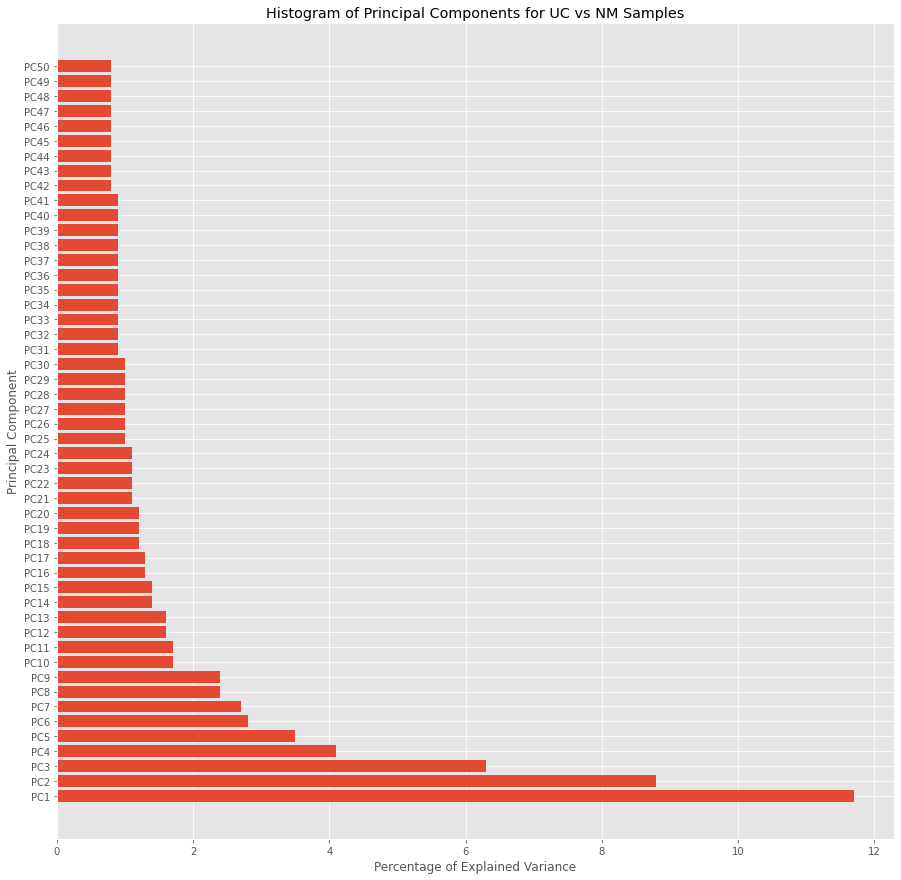

In [77]:
plt.figure(figsize = (15, 15))
plt.barh(y=range(1,len(per_var)+1)[:50], width=per_var[:50], tick_label=labels[:50])
plt.ylabel('Principal Component')
plt.xlabel('Percentage of Explained Variance')
plt.title('Histogram of Principal Components for UC vs NM Samples')
plt.show()

In [45]:
pca_df = pd.DataFrame(pca_data, index=uc.columns, columns=labels)
pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,PC51,PC52,PC53,PC54,PC55,PC56,PC57,PC58,PC59,PC60,PC61,PC62,PC63,PC64,PC65,PC66,PC67,PC68
GSM76030,-23.750844,-13.867972,10.215865,12.241192,-24.213700,12.092241,17.446542,15.314515,-11.552795,35.320337,40.575670,-20.372582,-34.628233,29.193393,29.939794,18.817691,-15.365328,29.693501,2.892988,-23.688984,-7.642454,-11.843295,3.874046,13.908030,22.161599,-10.760196,-14.740227,1.932483,-17.739688,-11.739119,-16.478382,-9.801497,26.929458,-11.464449,13.588967,12.743564,22.621473,13.783283,23.468913,10.910198,-19.553424,-8.994530,-12.703828,3.195986,-6.023616,18.129835,1.587056,28.703387,15.244736,3.114037,-1.395044,3.073251,-14.604925,-2.225161,3.060276,-10.696931,-2.312059,-14.469474,-1.642224,-11.882816,7.426733,-3.671199,0.455023,-1.762793,6.976378,-6.145168,5.349578,5.009881e-15
GSM76031,74.405113,-72.817802,10.886957,-35.724766,-30.132053,-22.481389,26.302840,-32.970411,30.383036,-0.968807,-21.137685,8.840953,27.165110,1.566032,-1.599915,-0.254547,-10.622121,10.990852,4.843959,-14.279920,-2.881748,-5.511677,4.517844,6.336717,8.691582,-1.979874,-14.422061,7.849789,0.225795,11.289441,-7.331610,-1.686437,34.599738,-0.925666,-12.501295,-11.794764,-6.669625,-3.383153,-2.170750,-18.303926,2.729284,-13.216971,-5.817179,12.283753,8.173783,-9.173758,2.132514,15.830662,-0.899179,17.378879,-5.789883,16.897589,-25.654442,6.644530,22.616339,20.498156,30.413418,34.877281,-14.235521,9.865512,-5.125885,8.545257,-15.751348,7.453871,-12.157450,-0.851676,3.861005,-1.101896e-13
GSM76032,104.327002,-9.421991,50.649441,-39.380519,7.289050,-20.154174,-7.039603,45.234812,-43.130379,7.718895,27.838408,-22.203429,31.667601,-21.900301,54.195723,-40.436310,-43.739320,-41.576312,-12.152001,-9.741499,26.533727,-0.612203,20.039519,-11.771487,0.897481,-7.357629,-10.404257,2.134020,-15.428817,-6.116944,4.968444,-18.145154,-9.340908,6.043715,-0.502819,-0.501412,-8.543097,-14.582959,-7.871708,-0.555855,-1.983716,2.872403,1.585019,3.510006,-3.713453,-7.025217,5.907445,-1.617534,3.113417,3.634629,2.434349,-3.623459,-0.161636,-6.574870,1.139335,-9.826786,1.629001,-4.105441,-7.822802,-1.251822,-1.782444,4.075178,1.651413,-1.827765,-7.406850,5.066278,-1.871839,-6.575296e-14
GSM76033,62.996057,26.573871,64.828672,-15.241769,-25.233411,3.742871,-30.579170,-4.922326,16.841631,-12.869057,-14.662205,14.616502,16.727384,17.413635,-0.760849,0.256656,-21.492050,-0.020775,-15.307029,8.884686,2.876117,-8.100685,-6.251952,13.792389,-11.455609,-5.880549,-14.468437,2.552361,-1.680127,5.483928,7.170015,11.709636,8.030454,5.064294,-4.911277,1.014921,-15.758625,7.993543,-0.467429,-1.757569,-20.400747,6.201539,-1.016755,-13.989461,6.893821,14.893768,-4.626845,0.131960,-8.941340,-5.724080,10.620914,13.623580,-1.765005,-5.554299,-24.083751,23.635071,-8.240142,-10.675879,-10.217942,7.516928,3.881529,11.768639,3.818231,-7.493713,62.702098,-1.969715,15.076113,-3.441691e-15
GSM76034,-41.357844,21.991112,52.222694,52.711369,27.264053,19.425142,-36.753348,12.580255,53.387169,-4.936982,-17.295070,6.762321,35.865929,-22.165560,-0.690142,-13.085719,0.319567,16.184746,-8.774957,-9.940262,3.061233,8.434217,5.887940,-20.609342,-2.478114,-0.908371,8.897656,11.217838,6.293542,-4.445160,-0.099770,-17.199576,18.029601,-6.858150,0.782225,26.074500,-10.386904,-8.655138,11.805127,4.322401,-16.573536,19.182562,10.298822,10.084917,-35.207190,24.834350,0.628507,16.097984,-17.930168,-8.827014,12.043758,-5.974639,21.983716,15.233990,22.475557,-4.418997,7.574768,4.661694,0.405918,-9.330396,6.599083,-5.247960,-1.549552,13.703525,-6.090711,-9.823883,10.884991,2.012279e-14


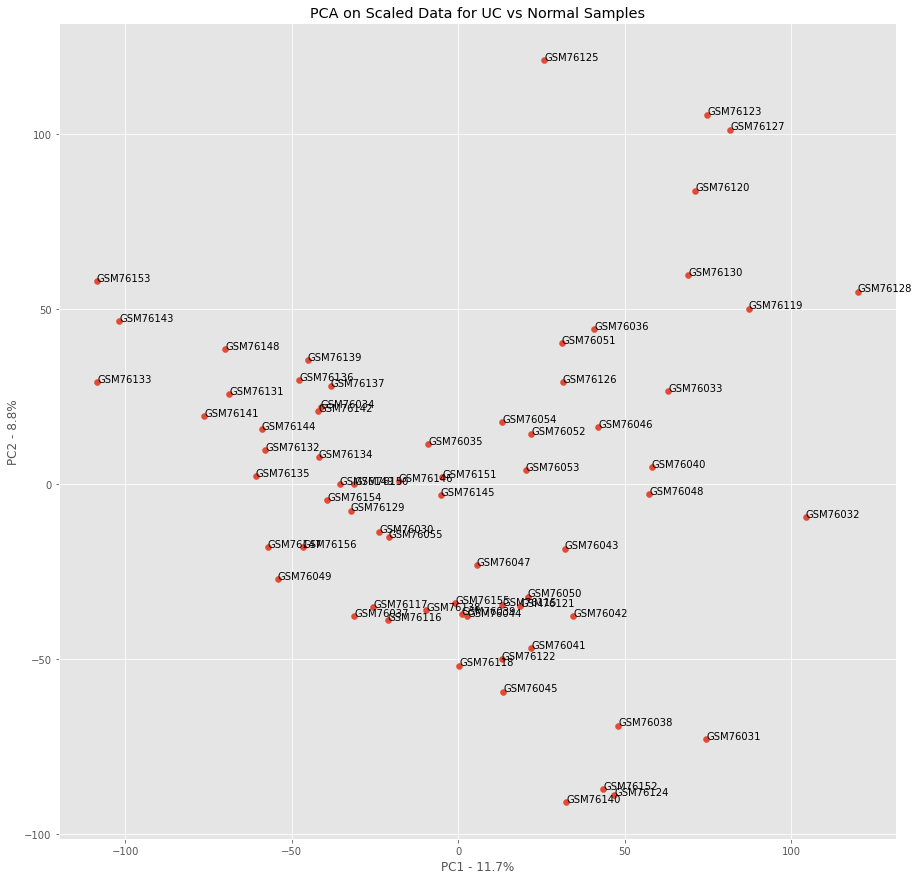

In [46]:
#Scatterplot of data with first and second principal components
plt.figure(figsize = (15, 15))
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA on Scaled Data for UC vs Normal Samples')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
    
plt.show()

### Determine which genes are differentially expressed

In [47]:
loading_scores = pd.Series(pca.components_[0], index=uc.index)

In [48]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False) #Sort based on magnitude (absolute value)

In [49]:
top_genes = sorted_loading_scores[0:50].index.values
top_genes

array(['200682_s_at', '218036_x_at', '201532_at', '219939_s_at',
       '208761_s_at', '200777_s_at', '209388_at', '203203_s_at',
       '202824_s_at', '202557_at', '222035_s_at', '207791_s_at',
       '202673_at', '202918_s_at', '218738_s_at', '202141_s_at',
       '210097_s_at', '205277_at', '210281_s_at', '221727_at',
       '214512_s_at', '201255_x_at', '217883_at', '201595_s_at',
       '200662_s_at', '203377_s_at', '203403_s_at', '212418_at',
       '209517_s_at', '202246_s_at', '210104_at', '200927_s_at',
       '214683_s_at', '209180_at', '217915_s_at', '201133_s_at',
       '221596_s_at', '211297_s_at', '211936_at', '221763_at',
       '200624_s_at', '212060_at', '212518_at', '209139_s_at',
       '219094_at', '213548_s_at', '201746_at', '218277_s_at',
       '202776_at', '209063_x_at'], dtype=object)

### NCBI GEO2R Analysis via limma and UMAP libraries

In [83]:
geo_uc = pd.read_csv('uc_vs_n.top.table.csv', index_col='ID')
geo_df = geo_uc['Gene.title'][:10]
geo_df

ID
211074_at                                      folate receptor 1
202391_at      brain abundant membrane attached signal protein 1
208540_x_at                                                  NaN
200680_x_at                            high mobility group box 1
200660_at                       S100 calcium binding protein A11
211430_s_at    microRNA 8071-2///microRNA 8071-1///immunoglob...
222147_s_at                 ARP5 actin-related protein 5 homolog
208987_s_at                                lysine demethylase 2A
205896_at                      solute carrier family 22 member 4
217157_x_at    immunoglobulin kappa locus///immunoglobulin ka...
Name: Gene.title, dtype: object

In [84]:
genes = []
for id in top_genes:
    result = geo_uc.loc[id]
    genes.append(result[-1])
genes

top50 = list(zip(top_genes, genes))
uc_top50 = pd.DataFrame(top50, columns = ['ID', 'PCA Differential'])
uc_top50

,ID,PCA Differential
0,200682_s_at,ubiquitin conjugating enzyme E2 L3
1,218036_x_at,NMD3 ribosome export adaptor
2,201532_at,proteasome subunit alpha 3
3,219939_s_at,cold shock domain containing E1
4,208761_s_at,small ubiquitin-like modifier 1
5,200777_s_at,basic leucine zipper and W2 domains 1
6,209388_at,poly(A) polymerase alpha
7,203203_s_at,"KRR1, small subunit processome component homolog"
8,202824_s_at,transcription elongation factor B subunit 1
9,202557_at,heat shock protein family A (Hsp70) member 13


In [85]:
#List of genes from PCA analysis
compare = uc_top50['PCA Differential'][:10]
compare

0                  ubiquitin conjugating enzyme E2 L3
1                        NMD3 ribosome export adaptor
2                          proteasome subunit alpha 3
3                     cold shock domain containing E1
4                     small ubiquitin-like modifier 1
5               basic leucine zipper and W2 domains 1
6                            poly(A) polymerase alpha
7    KRR1, small subunit processome component homolog
8         transcription elongation factor B subunit 1
9       heat shock protein family A (Hsp70) member 13
Name: PCA Differential, dtype: object

In [86]:
# Table of PCA vs Bioconductor differently expressed genes

compare = pd.DataFrame(list(zip(compare, geo_df[:10])), columns=['PCA Differential/UC vs NM', 'Bioconductor Differential/UC vs NM'])

In [92]:
# Fill n/a with 'Affy Gene' becuase gene id is an affymetrix unpublished gene
compare = compare.fillna('Affy Gene')
compare.head(10)

,PCA Differential/UC vs NM,Bioconductor Differential/UC vs NM
0,ubiquitin conjugating enzyme E2 L3,folate receptor 1
1,NMD3 ribosome export adaptor,brain abundant membrane attached signal protein 1
2,proteasome subunit alpha 3,Affy Gene
3,cold shock domain containing E1,high mobility group box 1
4,small ubiquitin-like modifier 1,S100 calcium binding protein A11
5,basic leucine zipper and W2 domains 1,microRNA 8071-2///microRNA 8071-1///immunoglob...
6,poly(A) polymerase alpha,ARP5 actin-related protein 5 homolog
7,"KRR1, small subunit processome component homolog",lysine demethylase 2A
8,transcription elongation factor B subunit 1,solute carrier family 22 member 4
9,heat shock protein family A (Hsp70) member 13,immunoglobulin kappa locus///immunoglobulin ka...


### K Means Clustering

In [54]:
uc_km = pd.DataFrame(pca_df, columns=['PC1', 'PC2'])
uc_km

,PC1,PC2
GSM76030,-23.750844,-13.867972
GSM76031,74.405113,-72.817802
GSM76032,104.327002,-9.421991
GSM76033,62.996057,26.573871
GSM76034,-41.357844,21.991112
...,...,...
GSM76152,43.547651,-87.223269
GSM76153,-108.541144,58.013389
GSM76154,-39.358503,-4.609652
GSM76155,-0.868213,-34.125662


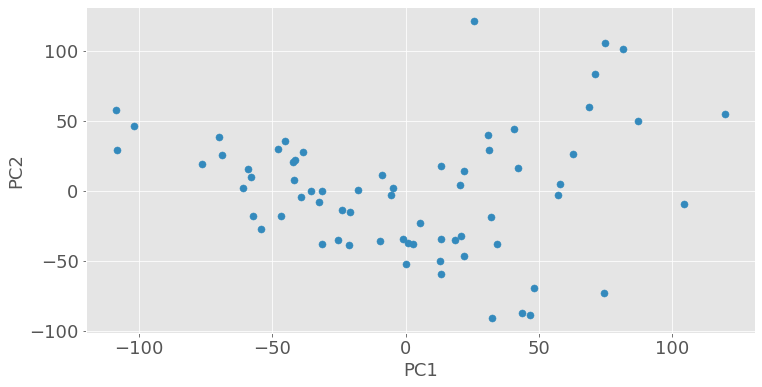

In [55]:
# Plot the scatter
ax = uc_km.plot(kind="scatter", x='PC1', y='PC2', figsize=(12,6), s=50)
plt.xlabel("PC1", fontsize=18)
plt.ylabel("PC2", fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=18)

In [99]:
X = uc_km.loc[:, ['PC1', 'PC2']]
sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Comparing 2 clusters

In [100]:
km = KMeans(n_clusters=2, random_state=42)
km.fit(X_sc)

KMeans(n_clusters=2, random_state=42)

In [101]:
km.cluster_centers_

array([[-0.36021296, -0.30777475],
       [ 1.24873825,  1.06695247]])

In [102]:
km.predict(X_sc)

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

In [103]:
uc_km['cluster'] = km.labels_
uc_km

,PC1,PC2,cluster
GSM76030,-23.497138,-14.538643,0
GSM76031,74.228902,-74.135955,0
GSM76032,104.355695,-11.616558,1
GSM76033,63.433853,23.956608,1
GSM76034,-40.812351,20.480294,0
...,...,...,...
GSM76152,43.194194,-87.625426,0
GSM76153,-107.692409,57.278084,0
GSM76154,-39.192126,-4.339952,0
GSM76155,-0.995538,-33.692601,0


In [106]:
actuals = []
for item in UC:
    actuals.append(0)


In [107]:
for item in NM:
    actuals.append(1)

In [109]:
uc_km['actual'] = actuals
        
uc_km

,PC1,PC2,cluster,actual
GSM76030,-23.497138,-14.538643,0,0
GSM76031,74.228902,-74.135955,0,0
GSM76032,104.355695,-11.616558,1,0
GSM76033,63.433853,23.956608,1,0
GSM76034,-40.812351,20.480294,0,0
...,...,...,...,...
GSM76152,43.194194,-87.625426,0,1
GSM76153,-107.692409,57.278084,0,1
GSM76154,-39.192126,-4.339952,0,1
GSM76155,-0.995538,-33.692601,0,1


In [111]:
uc_km.groupby('cluster').mean()

,PC1,PC2,actual
cluster,,,
0,-18.478250,-13.650948,0.634615
1,64.057934,47.323287,0.533333


In [115]:
centroids = pd.DataFrame(
    sc.inverse_transform(km.cluster_centers_),
    columns=['PC1', 'PC2']
)
centroids

,PC1,PC2
0,-18.478250,-13.650948
1,64.057934,47.323287


<Figure size 504x504 with 0 Axes>

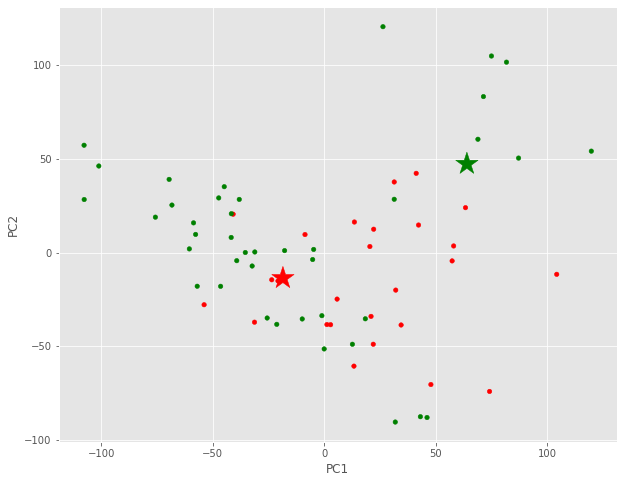

In [119]:
# Code modified from Generally Assembly Data Science Immersive-KMeans Lesson

plt.figure(figsize=(7,7));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green"]
uc_km['color'] = uc_km['actual'].map(lambda p: colors[p])


ax = uc_km.plot(    
    kind="scatter", 
    x='PC1', y='PC2',
    figsize=(10,8),
    c = uc_km['color']
)

centroids.plot(
    kind="scatter", 
    x='PC1', y='PC2', 
    marker="*", c=["r", "g"], s=550,
    ax=ax
);

### Compare to UMAP in limma/Bioconductor


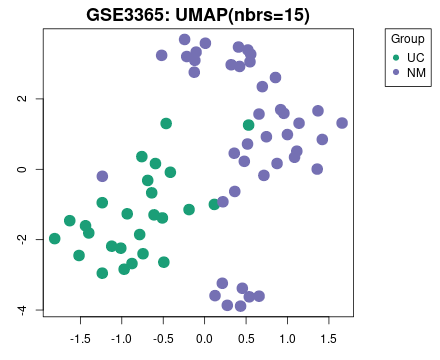


In [120]:
from sklearn.metrics import silhouette_score
uc_sil = silhouette_score(X_sc[:len(UC)], km.labels_[:len(UC)])
nm_sil = silhouette_score(X_sc[len(UC): ], km.labels_[len(UC):])
uc_sil, nm_sil

(0.3252796815415119, 0.5573694484691128)